# Applied Project: 
## US Divorce and Marriage Data Taken From CDC Website

In [52]:
import numpy as np 
import scipy.stats as stats 
import pandas as pd 
import matplotlib.pyplot as plt 

In [66]:
#Data urls 
marriage_url = 'https://www.cdc.gov/nchs/data/dvs/state-marriage-rates-90-95-99-19.xlsx'
divorce_url  = 'https://www.cdc.gov/nchs/data/dvs/state-divorce-rates-90-95-99-19.xlsx'

# Import Marriage Data 

In [125]:
data = pd.read_excel(marriage_url, header = 5)
data.head()

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2000,1999,1995,1990,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,10.1,10.8,9.8,10.6,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.9,8.6,9.0,10.2,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,7.5,8.2,8.8,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,15.4,14.8,14.4,15.3,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
#drop irrelevant rows, decided manually by examining spreadsheet 

data.drop([0,52,53,54,55,56,57], axis = 0, inplace = True)
data.head()

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2000,1999,1995,1990,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,10.1,10.8,9.8,10.6,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.9,8.6,9.0,10.2,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,7.5,8.2,8.8,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,15.4,14.8,14.4,15.3,NaN,NaN,NaN,NaN,NaN,NaN
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,5.8,6.4,6.3,7.9,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
#replace --- with nan 
data.replace({'---':np.nan}, inplace = True)
data.head()

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2000,1999,1995,1990,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,10.1,10.8,9.8,10.6,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.9,8.6,9.0,10.2,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,7.5,8.2,8.8,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,15.4,14.8,14.4,15.3,NaN,NaN,NaN,NaN,NaN,NaN
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,5.8,6.4,6.3,7.9,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
##Replace NaN with median value 
#Assumption based on states having roughly same marriage rates each year 

data.fillna(data.median(), inplace = True) 
data.head()

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2000,1999,1995,1990,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,10.1,10.8,9.8,10.6,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.9,8.6,9.0,10.2,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,7.5,8.2,8.8,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,15.4,14.8,14.4,15.3,NaN,NaN,NaN,NaN,NaN,NaN
5,California 1,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,6.0,5.8,...,5.8,6.4,6.3,7.9,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
#Extract Data into individual matrices 

year_mar = data.columns[1:24 ].to_numpy().astype(float)
year_mar

state_mar = data.iloc[:,0]
state_mar

m_rate = data.iloc[:,1:24].to_numpy()



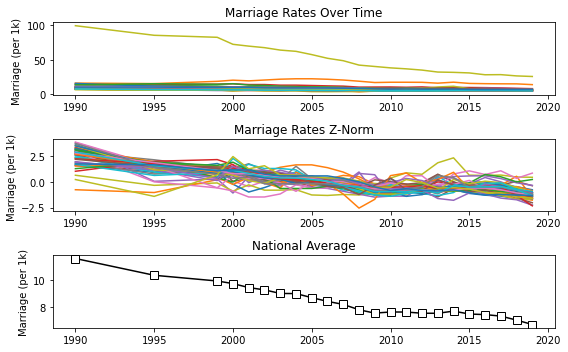

In [130]:
fig, ax = plt.subplots(3,1,figsize = (8,5)) 

ax[0].plot(year_mar,m_rate.T)
ax[0].set_ylabel('Marriage (per 1k) ')
ax[0].set_title("Marriage Rates Over Time")

ax[1].plot(year_mar,stats.zscore(m_rate.T))
ax[1].set_ylabel('Marriage (per 1k) ')
ax[1].set_title("Marriage Rates Z-Norm")

ax[2].plot(year_mar,np.mean(m_rate,axis = 0),'ks-',markerfacecolor = 'w',markersize = 8)
ax[2].set_ylabel('Marriage (per 1k)')
ax[2].set_title('National Average')

plt.tight_layout()
plt.show()



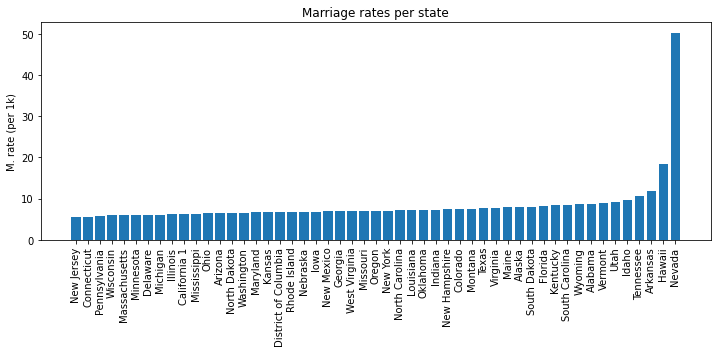

In [132]:
#barplot 

#average over time 
meanM_rate = np.mean(m_rate,axis=1)

#sort
sidx_M = np.argsort(meanM_rate)

fig = plt.figure(figsize=(12,4))
plt.bar(state_mar.iloc[sidx_M], meanM_rate[sidx_M])
plt.xticks(rotation = 90)
plt.ylabel('M. rate (per 1k)')
plt.title('Marriage rates per state')
plt.show()

#Note: Nevada not an outlier, higher marriage rate in vegas 


# Import Divorce Data 

In [135]:
data = pd.read_excel(divorce_url,header =5)
data.drop([0,52,53,54,55,56,57],axis=0,inplace=True)
data = data.replace({'---': np.nan})
data.fillna(data.median(), inplace=True)
data

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2000,1999,1995,1990,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
1,Alabama,3.572984,3.714296,3.660498,3.778710,3.853690,3.785022,3.683290,3.6,4.3,...,5.5,5.7,6.0,6.1,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,3.638874,3.734551,3.580722,3.946655,4.138499,3.951233,4.461784,4.5,4.8,...,3.9,5.0,5.0,5.5,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,2.915899,2.954273,3.479199,3.352007,3.578466,3.892010,3.929150,4.3,3.9,...,4.6,4.6,6.2,6.9,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,4.017159,4.066925,3.719694,3.926381,4.842516,4.845318,5.011872,5.3,5.3,...,6.4,6.2,6.3,6.9,NaN,NaN,NaN,NaN,NaN,NaN
5,California,2.867509,2.951789,3.030063,3.168503,3.177654,3.324706,3.405376,3.5,3.7,...,4.1,4.4,4.6,4.3,NaN,NaN,NaN,NaN,NaN,NaN
6,Colorado,3.291000,3.273600,3.186287,3.566256,3.725048,3.866602,4.073558,4.3,4.4,...,4.7,4.8,4.6,5.5,NaN,NaN,NaN,NaN,NaN,NaN
7,Connecticut,2.690386,2.853612,2.870533,3.168503,3.128197,2.577657,2.761618,2.7,3.1,...,3.3,3.0,2.9,3.2,NaN,NaN,NaN,NaN,NaN,NaN
8,Delaware,2.915491,2.800952,2.964845,3.079622,3.093239,3.256685,3.383206,3.5,3.6,...,3.9,4.5,5.0,4.4,NaN,NaN,NaN,NaN,NaN,NaN
9,District of Columbia,2.422958,2.521158,2.477045,2.739404,2.832372,2.577050,2.838584,2.9,2.9,...,3.2,3.6,3.2,4.5,NaN,NaN,NaN,NaN,NaN,NaN
10,Florida,3.489101,3.617673,3.612112,3.865675,3.956535,3.970182,4.110652,4.2,4.5,...,5.1,5.1,5.5,6.3,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#Extract Data into individual matrices 

yearD = data.columns[1:24 ].to_numpy().astype(float)
yearD

stateD = data.iloc[:,0]
stateD

D = data.iloc[:,1:24].to_numpy()

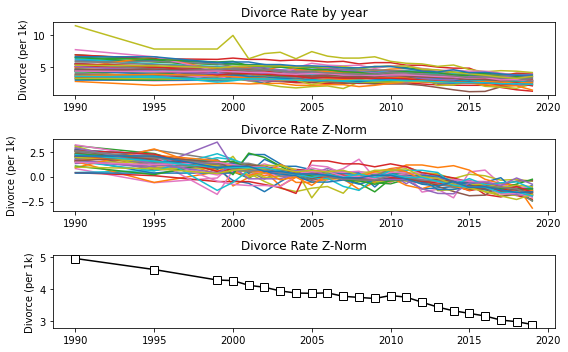

In [141]:
fig, ax = plt.subplots(3,1,figsize = (8,5))

ax[0].plot(yearD, D.T) 
ax[0].set_ylabel('Divorce (per 1k)')
ax[0].set_title('Divorce Rate by year')

ax[1].plot(yearD, stats.zscore(D.T))
ax[1].set_ylabel('Divorce (per 1k)')
ax[1].set_title('Divorce Rate Z-Norm')

ax[2].plot(yearD, np.mean(D, axis = 0), 'ks-', markerfacecolor = 'w', markersize = 8)
ax[2].set_ylabel('Divorce (per 1k)')
ax[2].set_title('Divorce Rate Z-Norm')

plt.tight_layout()
plt.show()

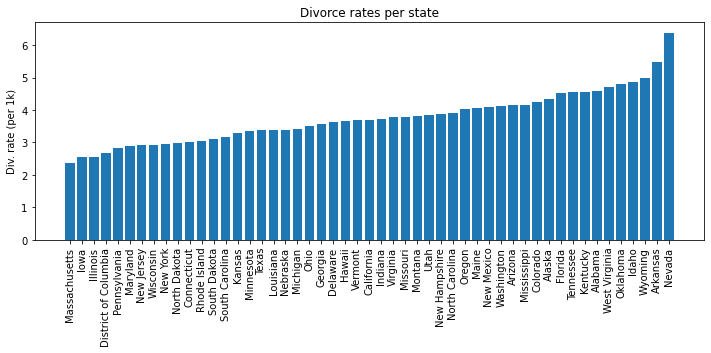

In [147]:
#boxplot 

meanD_rate = np.mean(D, axis = 1)
sidx = np.argsort(meanD_rate)

fig = plt.figure(figsize = (12,4))

plt.bar(stateD.iloc[sidx],meanD_rate[sidx])
plt.xticks(rotation = 90) 
plt.ylabel('Div. rate (per 1k)')
plt.title('Divorce rates per state')
plt.show()